In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/conne/Python Scripts/Dataset/pokemon.csv")

In [3]:
print(data.head())
print(data.shape)


   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
(800, 13)


In [4]:
data.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
data['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Water       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


# Scatter Plot

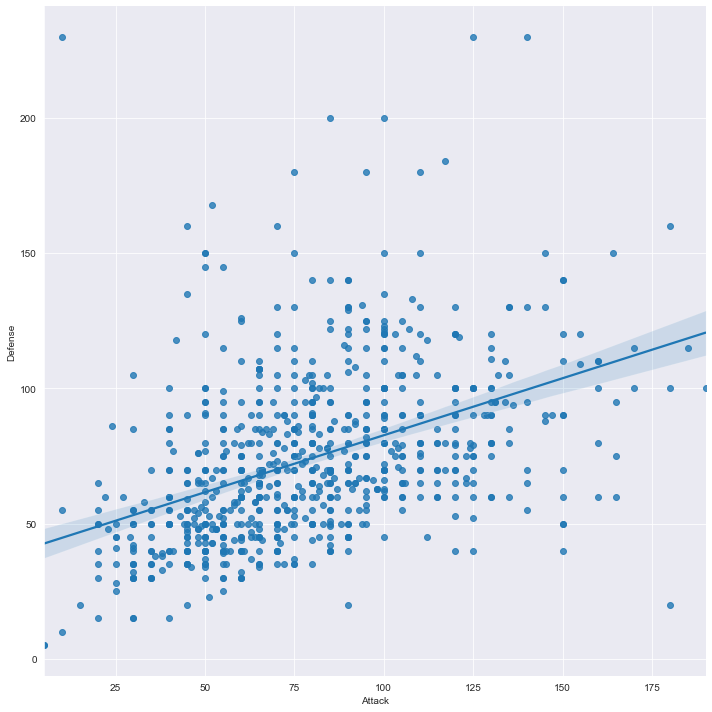

In [23]:
sns.set_style('darkgrid')
sns.lmplot(x='Attack', y='Defense', 
           data=data,
           height=10)

# Scatter Plot with hue

Text(0.5, 1.0, 'Attack vs Defence based on Pokemon Generation')

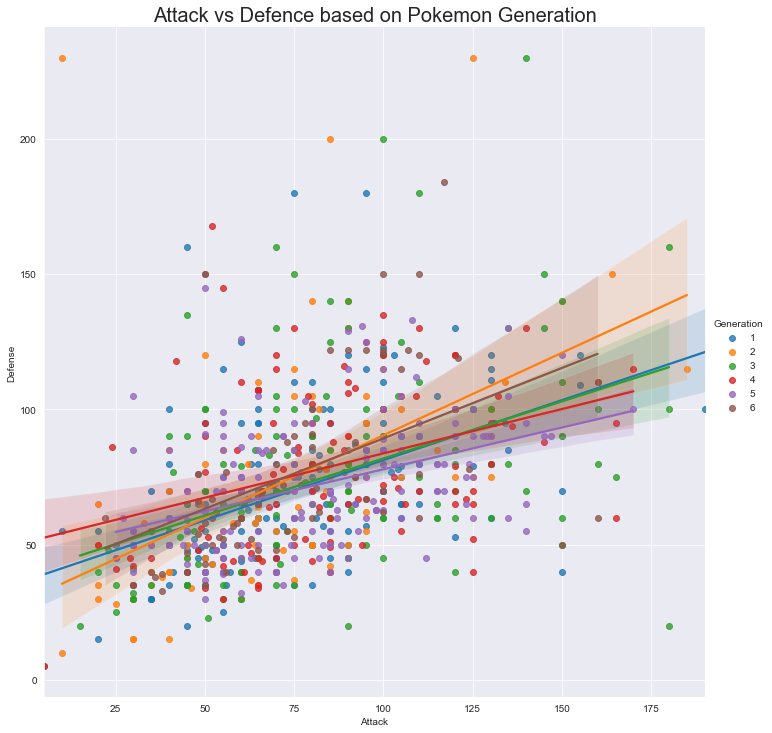

In [24]:

sns.lmplot(x='Attack',y='Defense',data=data,
          height=10,
          hue='Generation')
          #fit_reg=False)


plt.title("Attack vs Defence based on Pokemon Generation",size=20)


# Box Plot

In [58]:
bp_df = data.drop(data.columns[[0,4,11,12]],axis=1)
bp_df.head(2)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60


Text(0.5, 1.0, 'Stats of the continous predictors')

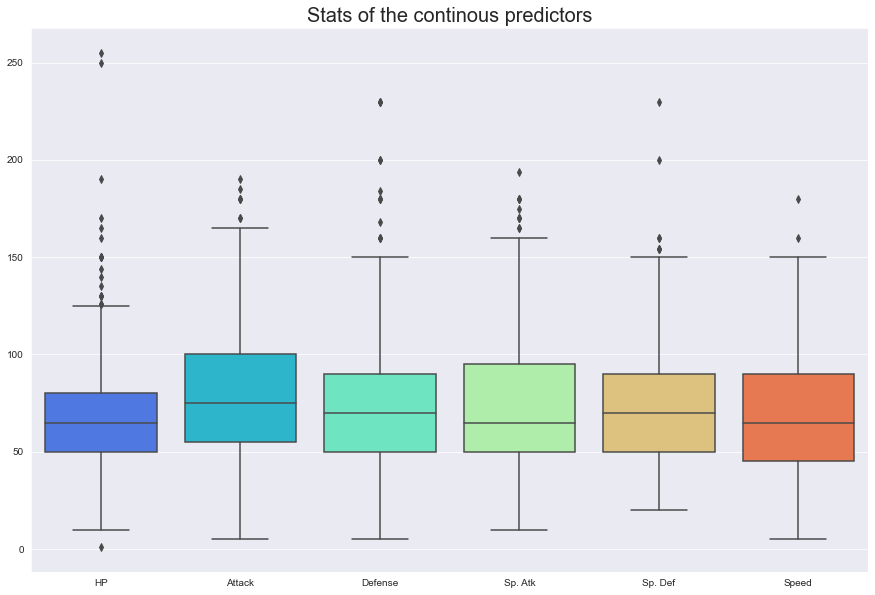

In [47]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bp_df,palette='rainbow')
plt.title("Stats of the continous predictors",size=20)

# Violin Plot

Text(0.5, 1.0, 'Attack value for Type-1 Pokemon')

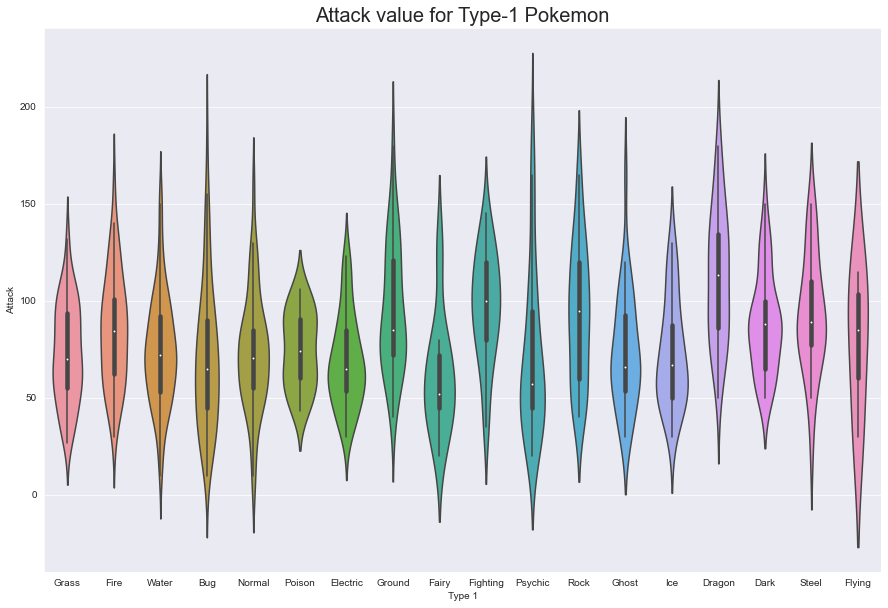

In [38]:
fig,ax = plt.subplots(figsize=(15,10))
sns.violinplot(x='Type 1',y='Attack',data=data,pallette='rainbow')
plt.title("Attack value for Type-1 Pokemon",size=20)

Text(0.5, 1.0, 'Defense value for Type-1 Pokemon')

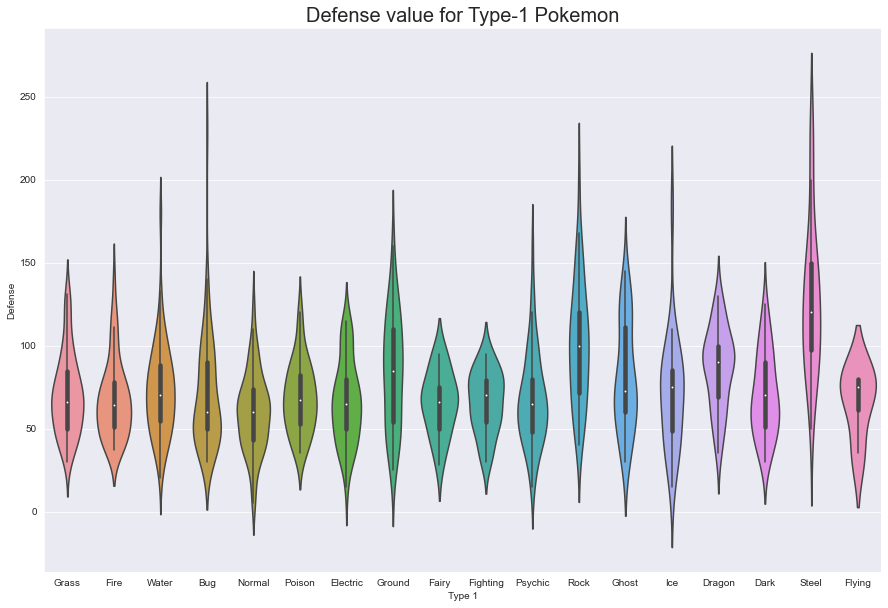

In [39]:
fig,ax = plt.subplots(figsize=(15,10))
sns.violinplot(x='Type 1',y='Defense',data=data,pallette='rainbow')
plt.title("Defense value for Type-1 Pokemon",size=20)

# Swarm Plot

Text(0.5, 1.0, 'Attack value for Type-2 Pokemon')

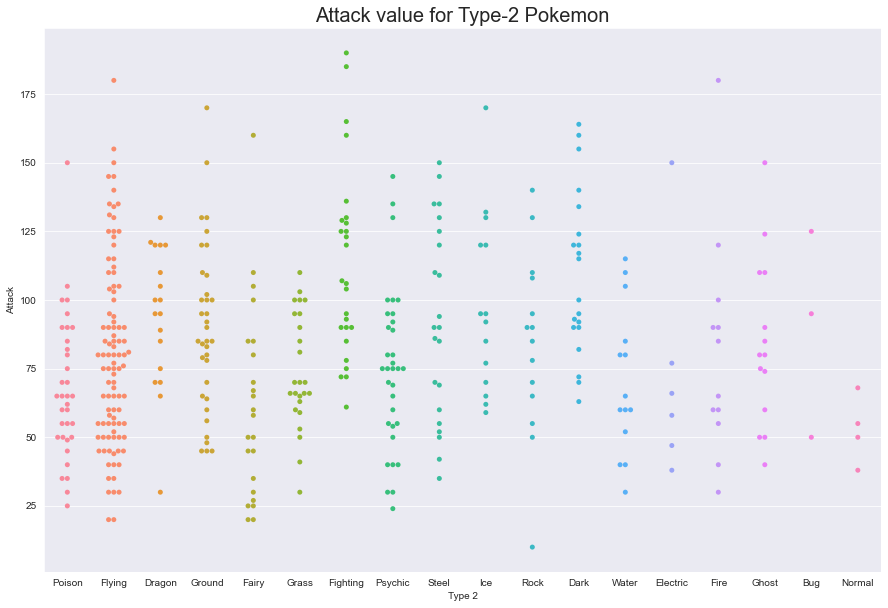

In [43]:
fig,ax = plt.subplots(figsize=(15,10))
sns.swarmplot(x='Type 2',y='Attack',data=data)
plt.title("Attack value for Type-2 Pokemon",size=20)

Text(0.5, 1.0, 'Defense value for Type-2 Pokemon')

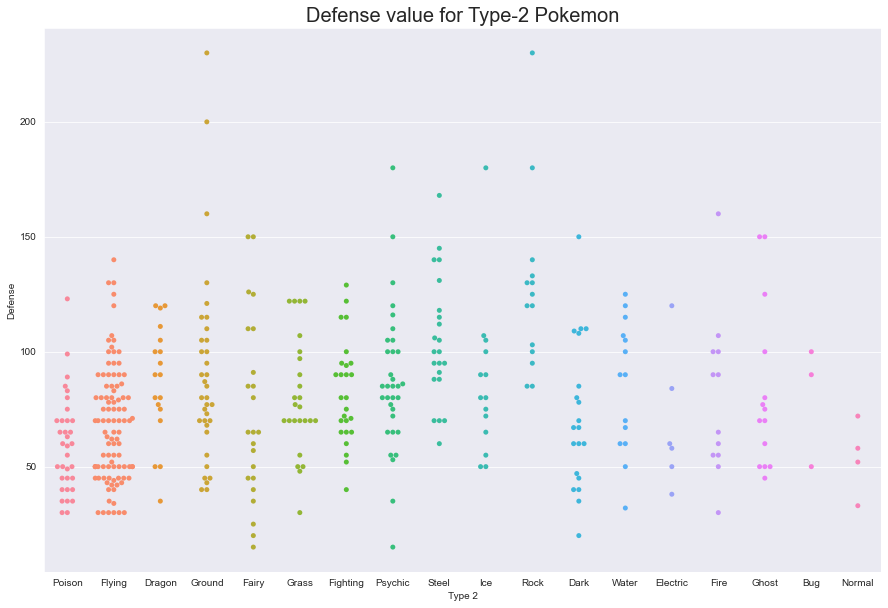

In [44]:
fig,ax = plt.subplots(figsize=(15,10))
sns.swarmplot(x='Type 2',y='Defense',data=data)
plt.title("Defense value for Type-2 Pokemon",size=20)

# Combine Violin Plot with Swarm Plot

Text(0.5, 1.0, 'Attack and Defence of Type-1 Pokemon')

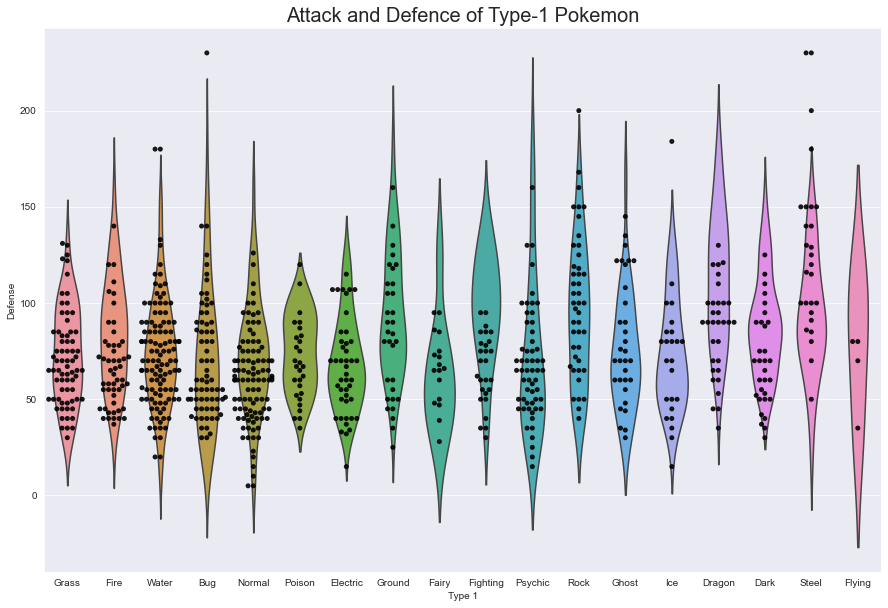

In [54]:
fig,ax = plt.subplots(figsize=(15,10))

sns.violinplot(x='Type 1',y='Attack',data=data,inner=None)

sns.swarmplot(x='Type 1',y='Defense',data=data,color='k',alpha=0.9)

plt.title("Attack and Defence of Type-1 Pokemon",size=20)

# Swarm Plot with hue

In [59]:
melted_df = pd.melt(bp_df,id_vars=["Name","Type 1","Type 2"],var_name="stat")

In [60]:
melted_df.head(3)

,Name,Type 1,Type 2,stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80


Text(0.5, 1.0, 'Type-1 Pokemon')

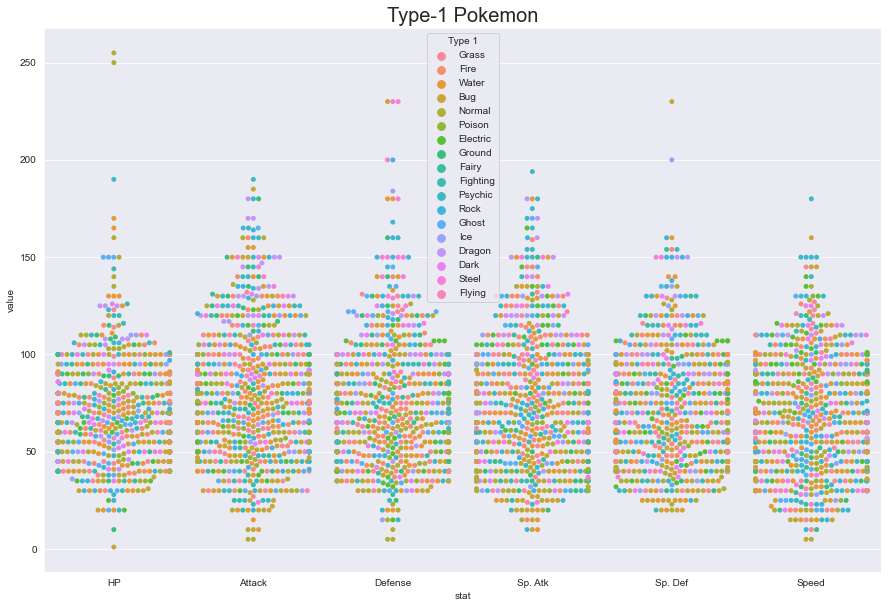

In [63]:
fig,ax = plt.subplots(figsize=(15,10))
sns.swarmplot(x='stat',y='value',data=melted_df,hue='Type 1')
plt.title("Type-1 Pokemon",size=20)

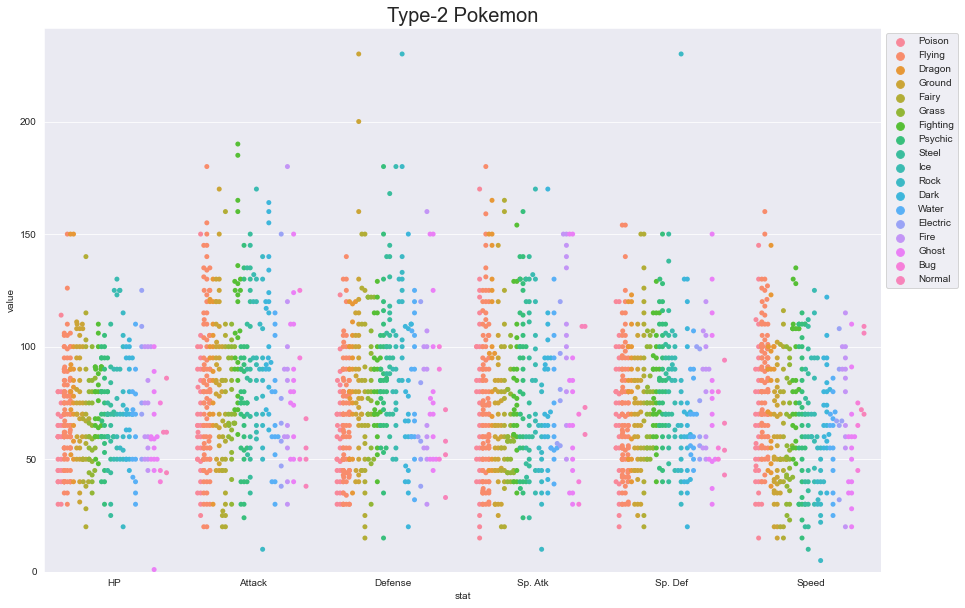

In [67]:
fig,ax = plt.subplots(figsize=(15,10))
sns.swarmplot(x='stat',y='value',data=melted_df,hue='Type 2',dodge=True)
plt.title("Type-2 Pokemon",size=20)
plt.ylim(0,None)
plt.legend(bbox_to_anchor=(1,1),loc=2)

# Heat Map

Text(0.5, 1.0, 'Correlation of Stats of Pokemons')

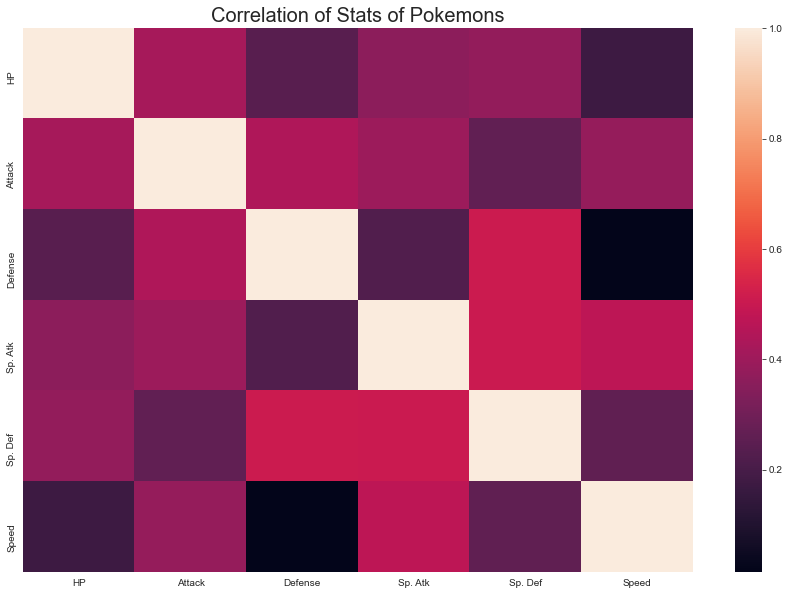

In [70]:

fig,ax = plt.subplots(figsize=(15,10))
corr_df = bp_df.corr()
sns.heatmap(corr_df)
plt.title("Correlation of Stats of Pokemons",size=20)

# Histogram

Text(0.5, 1.0, 'Speed of Pokemons')

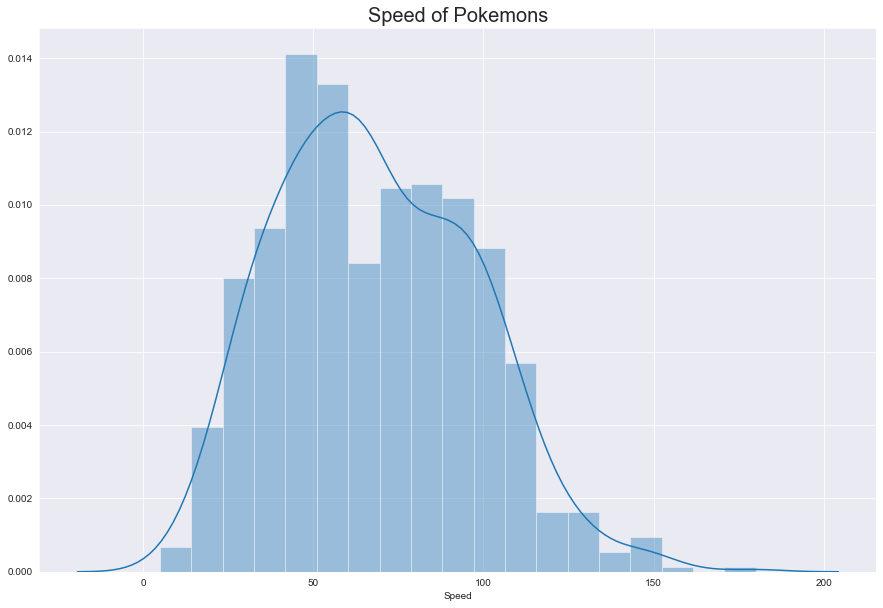

In [74]:
fig,ax = plt.subplots(figsize=(15,10))
sns.distplot(data.Speed)
plt.title("Speed of Pokemons",size=20)

# Bar Chart

Text(0.5, 1.0, 'Count of Type-1 Pokemons')

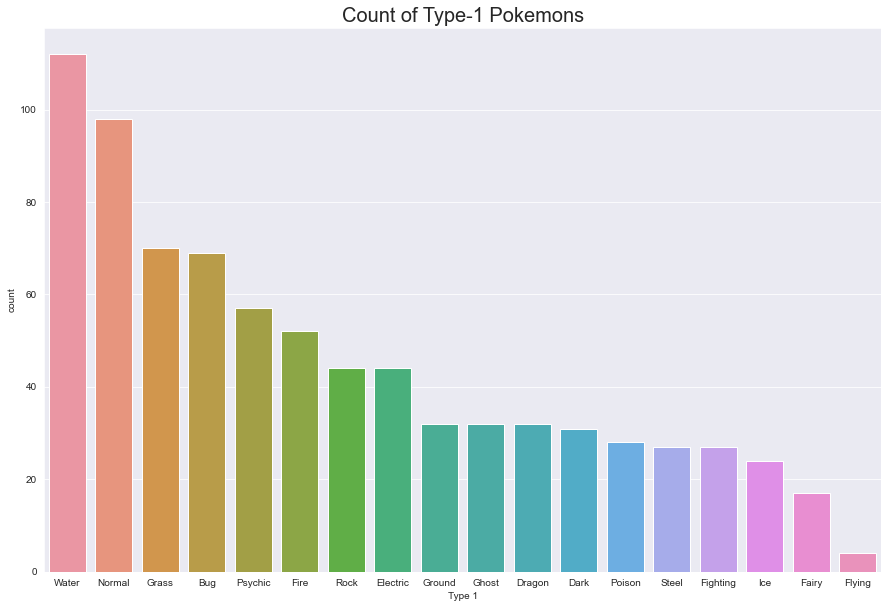

In [77]:
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(x='Type 1',data=data,order=data['Type 1'].value_counts().index)
plt.title("Count of Type-1 Pokemons",size=20)

# Categorical Plot

Help : how to get the plots in specified rows and cols?

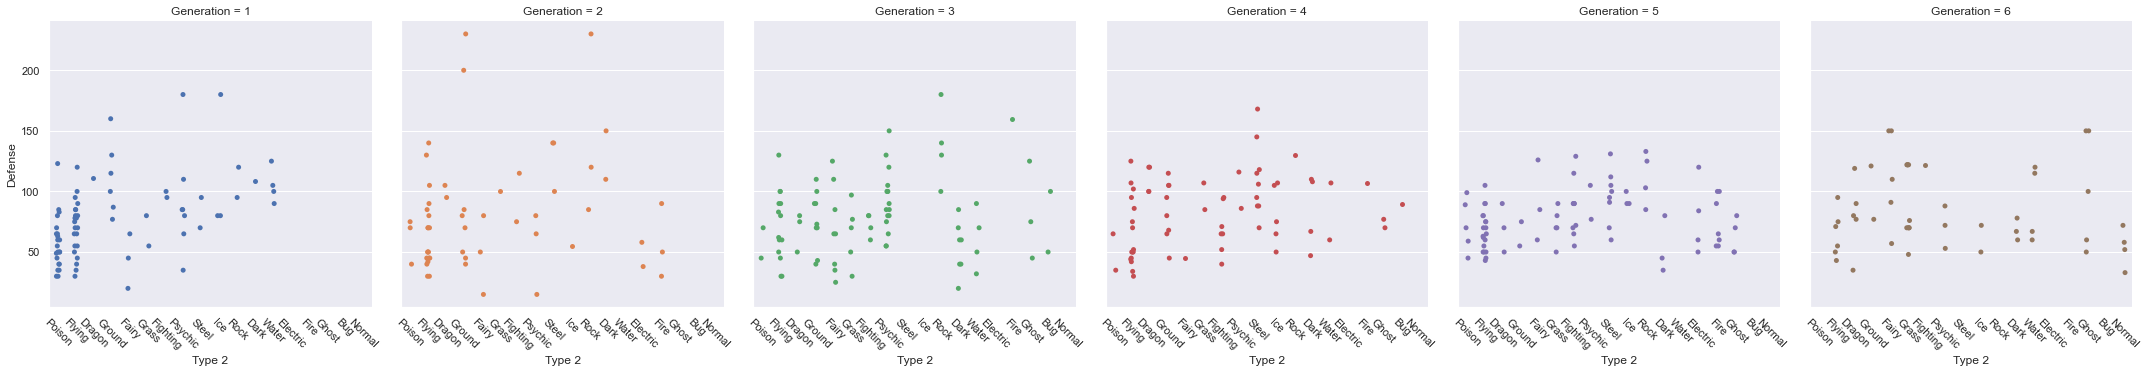

In [128]:
#fig, ax = plt.subplots(3,2, figsize=(12,10))
g = sns.catplot(x='Type 2',y='Defense',data=data,
              hue='Generation',col='Generation')
g.set_xticklabels(rotation=-45)

# Density Plot with Scatter Plot

Text(0.5, 1.0, 'Attack and Defence of Pokemon')

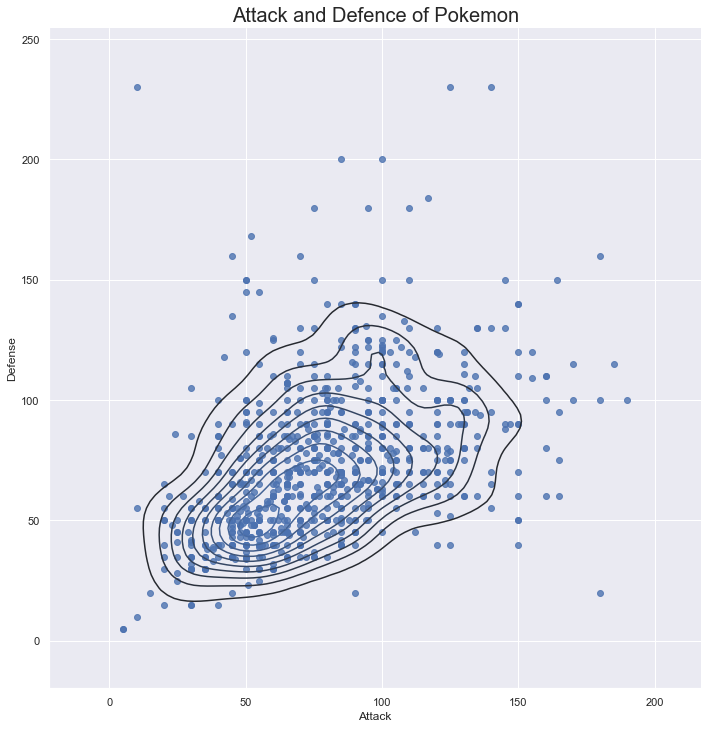

In [116]:
#fig,ax = plt.subplots(figsize=(15,10))

sns.lmplot(x='Attack', y='Defense', 
           data=data,
           height=10,
          fit_reg=False)
sns.kdeplot(data['Attack'],data['Defense'])
plt.title("Attack and Defence of Pokemon",size=20)

# Joint Plot

Text(0.0, 1.0, 'Attack and Defence of Pokemon')

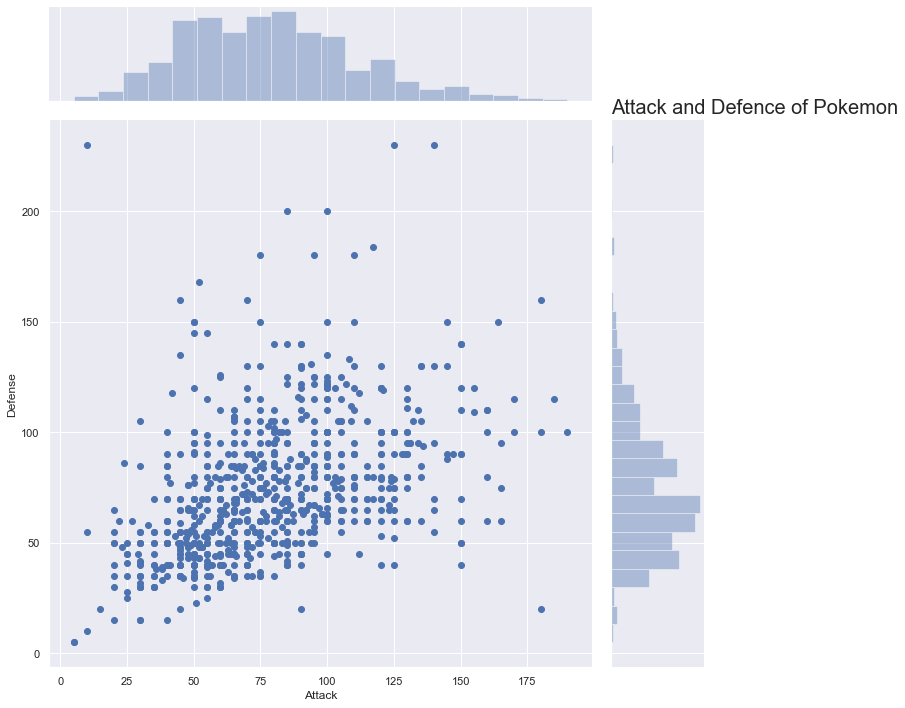

In [127]:
#fig,ax = plt.subplots(figsize=(15,10))
sns.jointplot(x='Attack', y='Defense', data=data,height=10)
plt.title("Attack and Defence of Pokemon",size=20,loc='left')